In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
# make_structure_df - Функция создания пандас-таблицы, описывающей структуру данных 
# Параметры:
# make_col_df - создать таблицу (True) или просто вывести на печать краткую структуру данных (False)
# nan_count - показать количетсов пропущенных данных в столбце
# max_nuniques_for_print - максимальное количество уникальных значений для вывода в столбце "uniques"
# max_nuniques_as_categorial - максимальное количество уникальных значений в столбце, при котором тип столбца признаётся категориальным

def make_structure_df(data, make_col_df=True, nan_count=False, max_nuniques_for_print = 5, max_nuniques_as_categorial = 10):
    
    columns=['col_name', 'col_type', 'type', 'nunique', 'uniques', 'max_len']
    
    if make_col_df == True:
        cols = []
    for col_name in data.columns:
        
        col_nunique = data[col_name].nunique()
        ctype = data[col_name].dtype.name
        
        if make_col_df == True:
            if (ctype == 'object') or (col_nunique <= max_nuniques_as_categorial):
                col_type = "categorial"
            elif ctype == 'datetime64[ns]':
                col_type = "datatime"
            else:
                col_type = "numeric"
            
            col_uniques = "..."
            if col_nunique <= max_nuniques_for_print:
                col_uniques = data[col_name].unique()
            
            if ctype == 'object':
                max_len = max(data[col_name].str.len())
            else:
                max_len = len(str(max(data[col_name])))
            
            cols.append([col_name, col_type, ctype, col_nunique, col_uniques, max_len])
    
    structure_df = pd.DataFrame(cols, columns=columns)
        
    if nan_count == True:
        structure_df['nan_count'] = data.isnull().sum(axis=0).tolist()
    
    return structure_df

In [4]:
#df.to_pickle('df_py27_201101-201608.pkl')
#df = pd.read_pickle('df_201101-201608.pkl')
df = pd.read_pickle('df_py27_201101-201608.pkl')

In [5]:
df_structure = make_structure_df(df)
df_structure

,col_name,col_type,type,nunique,uniques,max_len
0,Kuupдev,datatime,datetime64[ns],2050,...,19.0
1,Operatsioon,categorial,object,19793,...,40.0
2,AltkontoD1,categorial,object,974,...,50.0
3,AltkontoD2,categorial,object,19963,...,21.0
4,AltkontoK1,categorial,object,28283,...,100.0
5,AltkontoK2,categorial,object,7,...,21.0
6,AltkontoK3,categorial,object,6,...,42.0
7,Kogus,numeric,float64,865,...,7.0
8,Summa,numeric,float64,12355,...,8.0
9,Val,categorial,object,4,"[EUR, RUB, JPY, GBP]",3.0


In [12]:
df.head(20)

,Kuupдev,Operatsioon,AltkontoD1,AltkontoD2,AltkontoK1,AltkontoK2,AltkontoK3,Kogus,Summa,Val,SumVal,D1kod,D1regnr,D1tyyp,D1riik,D1GlubKredita,D1VAT,D1discont,D1Hinnad,K1kod,Код,Наименование,Розн_Цена,Опт_Цена,Прих_Цена,БазоваяЕдиница,ВалютаПрод,ВалютаЗакуп,Минимум,СтавкаНСО,Производитель,ШтрихКод,Страна,Поставщик,Емкость,Вес,КолВУпаковке,ВесУпаковки,ПродЦенаСНСО,Шифр,БезПартий,EKN,Цена2,Цена2СНСО,NameVene,NameEng,ISSA,LaduKoht,ДатаПослПрихода,НеУчитыватьВПрайс,Selgitus,SelgitusEng,SelgitusVene,FotoName,FotoName2,FotoName3,GUID,ID,КраткоеНаименование,АдресХраненияНаСкладе,ДатаИзменений,DocType,DocNum,DocNum2,DocDate2,Year,Month,Day,Weekday
0,2011-01-02,Arve/saateleht Ast-000006,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Pardo pika varrega pдrlinхel 6tk,Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,2.13,EUR,2.13,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,42/16/930200100,9.302001e+08,Pardo pika varrega pдrlinхel 6tk,0.00,0.0,0.979,tk,EEK,EUR,0.0,18 - 20 %,Viva Decor Gmbh,4042972620011,Saksamaa,Viva Decor Gmbh,0.0,0.02,3.0,0.0,0.0,V930200100,1.0,82055980,2.13,2.557,Комплект спиц для бусин Pardo 6шт,Pardo Pins 6pcs,,,. .,0.0,95,117,146,V930200100.bmp,V930200100-1.bmp,,973A2654-0DA7-4173-A3DD-9ED723945DE4,4515,Pardo pika varrega pдrlinхel 6tk,,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
1,2011-01-02,Arve/saateleht Ast-000006,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Must,Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,2.0,2.77,EUR,2.77,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,62/2300000/222/2/47811,4.781100e+04,Must,0.00,0.0,0.000,tk,EEK,EEK,0.0,18 - 20 %,C.Kreul,4000798478117,Saksamaa,C.Kreul,0.0,0.02,6.0,0.0,0.0,47811,1.0,96082000,1.38,1.662,Черный,Black,,,. .,0.0,1,1,1,47811.bmp,47811.bmp,47811.bmp,E152C035-7AF6-41CB-B227-162C076A5127,4680,Must,1-I2-2-3,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
2,2011-01-02,Arve/saateleht Ast-000006,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),"Kaadmium kollane, keskmine",Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,1.70,EUR,1.70,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,62/800000/2604201,2.604201e+06,"Kaadmium kollane, keskmine",23.73,0.0,0.830,tk,EEK,EUR,60.0,18 - 20 %,"ZAO ""ZKH Nevskaja Palitra""",4607010586591,Venemaa,"ZAO ""ZKH Nevskaja Palitra""",0.0,0.10,4.0,0.0,28.0,2604201,1.0,32131000,1.96,2.350,Кадмий желтый средний,Cadmium Yellow Medium,,,. .,0.0,1,1,1,2604201.bmp,2604201.bmp,2604201.bmp,056A481C-5998-4D9E-AFA1-7C1E820E5B3B,158,"Kaadmium kollane, keskmine",1-B1-4-1,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
3,2011-01-02,Arve/saateleht Ast-000006,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Kutsikad,Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,3.20,EUR,3.20,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,62/2500000/11/94000/940000500,9.400005e+08,Kutsikad,0.00,0.0,0.000,tk,EEK,EEK,0.0,18 - 20 %,Viva Decor Gmbh,4042972600631,Saksamaa,Viva Decor Gmbh,0.0,0.00,3.0,0.0,0.0,V940000500,1.0,32139000,3.20,3.835,Щенки,Puppies,,,. .,0.0,1,1,1,V940000500.bmp,,,327ECD6C-4A88-4838-AD28-15B9AAA16AAD,5467,Kutsikad,,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
4,2011-01-02,Arve/saateleht Ast-000006,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Hхbe,Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,2.56,EUR,2.56,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,27/100/0/47421,4.742100e+04,Hхbe,0.00,0.0,1.260,tk,EEK,EUR,0.0,18 - 20 %,C.Kreul,4000798474218,Saksamaa,C.Kreul,0.0,0.02,6.0,0.0,0.0,47421,1.0,96082000,2.56,3.068,Серебрянный,Silver,,,. .,0.0,1,1,1,47421.bmp,47421.bmp,47421.bmp,31B750A5-E97E-445F-9E93-5C5A791A0150,4652,Hхbe,1-I2-2-3,. .,Arve/saateleht,Ast-000006,Ast-000006,02.01.11,2011,1,2,6
5,2011-01-02,Arve/saateleht Ast-000006,Rock-Al-Mare kauplus,Ast-000006 (02.01.11),Hхbe,Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,2.45,EUR,2.45,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,27/100/2/47221,4.722100e+04,Hхbe,0.00,0.0,1.148,tk,EEK,EUR,0.0,18 - 20 %,C.Kreul,4000798472214,Saksamaa,C.Kreul,0.0,0.02,6.0,0.0,0.0,47221,1.0,96082000,2.45,2.940,Серебрянный,Silver,,,. .,0.0,1,1,1,47221.bmp,47221.bmp,472

In [ ]:
%%time
lens=[]
for i in df['D1kod'].str.split('/').values:
    lens.append(len(i))

In [25]:
np.unique(lens)

array([2, 3])

In [23]:
df['D1kod'].str.split('/',1).values

array([['520', '932'], ['520', '932'], ['520', '932'], ...,
       ['517', '55622/1923'], ['517', '55622/1923'], ['517', '55622/1923']], dtype=object)

### Looking at data set

In [7]:
pivot_qty = pd.pivot_table(df[df['Year']==2015][df['D1tyyp']=='Eraisik'], values='Summa', index=[u'Kuupдev'],
                     columns=['AltkontoK2'], fill_value = 0, aggfunc=[np.sum])

C:\Users\McSim\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [8]:
pivot_qty.head(5)

sum                                 \
AltkontoK2 Galerii MIX , Tallinn Pealadu Tallinn Raua 1 Tallinn   
Kuupдev                                                           
2015-01-02                361.05          127.19          80.12   
2015-01-03                352.95            0.00          97.94   
2015-01-04                  0.00            0.00           0.00   
2015-01-05                569.61          320.95         282.90   
2015-01-06                628.28            4.86         132.03   

                                             
AltkontoK2 Rocaalmaare Tallinn Tartu, Tasku  
Kuupдev                                      
2015-01-02             1097.24       577.18  
2015-01-03              896.39       569.40  
2015-01-04             1001.48       393.65  
2015-01-05             1050.21       752.38  
2015-01-06              798.41       515.79

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000002C8A8CC0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002A109D68>], dtype=object)

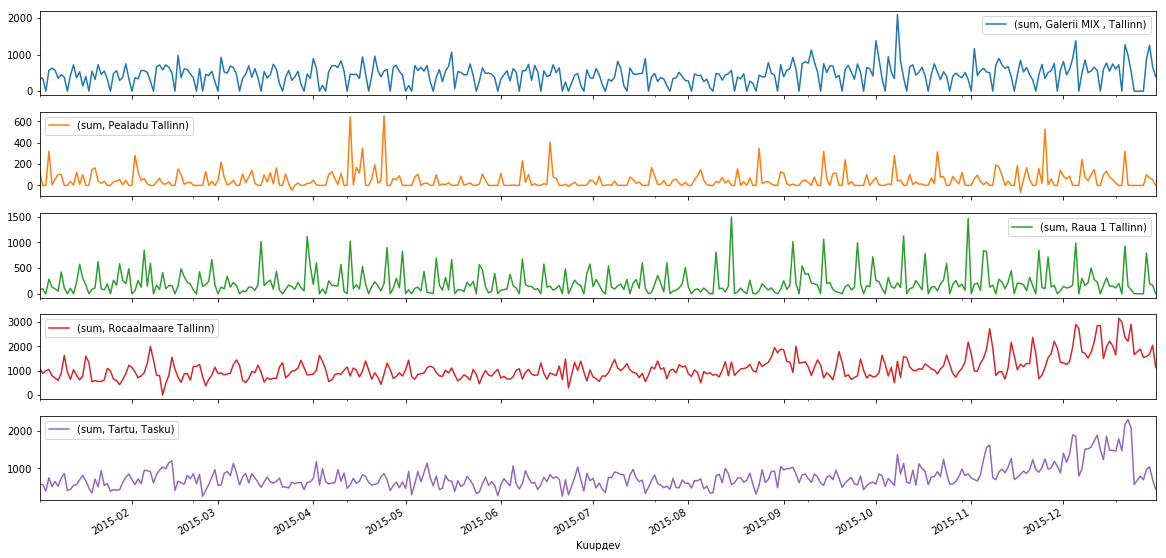

In [9]:
pivot_qty.plot(figsize=(20,10), subplots=True)

Два первых явно с выходными, остальные без. 
Вопросы к руководству компании:
    1. Какие значимые события были:
        - В октябре 2015 в Таллине, Микс.
        - В апреле 2015, главный склад
        - Декабрь 2015, Тарту.
    2. Были ли какие-либо существенные изменения в Рок-аль-Маре, начиная с конца октября 2015.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002CCCD780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002B15D4A8>]], dtype=object)

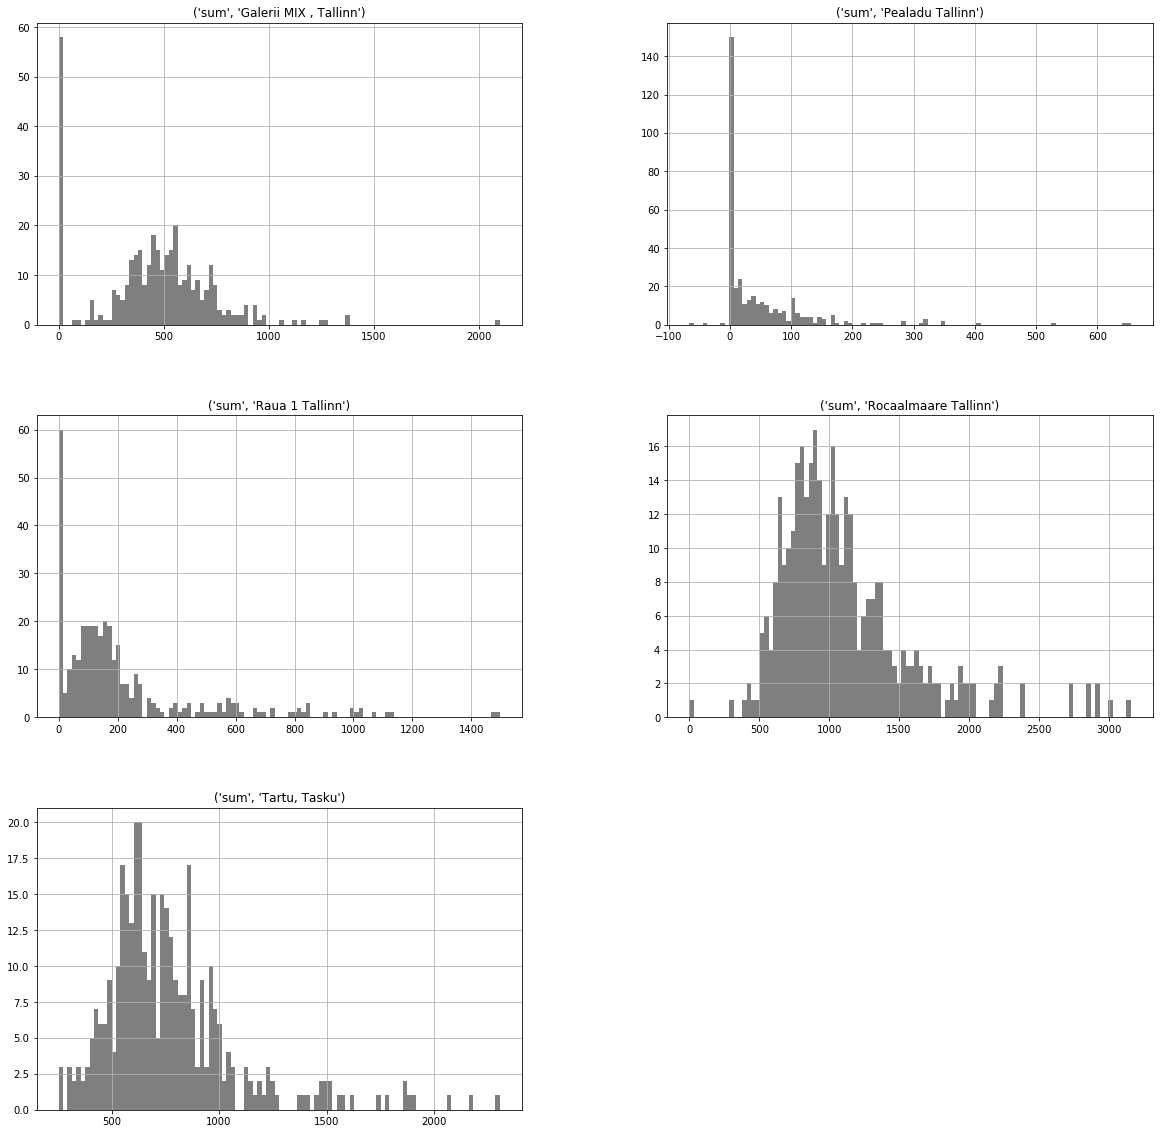

In [11]:
pivot_qty.hist(color='k', alpha=0.5, bins=100, figsize=(20,20))

<span style="color:red">*Надо проверить, почему по трём магазинам много продаж с нулевой суммой.*</span>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000028CC3400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002C94D828>]], dtype=object)

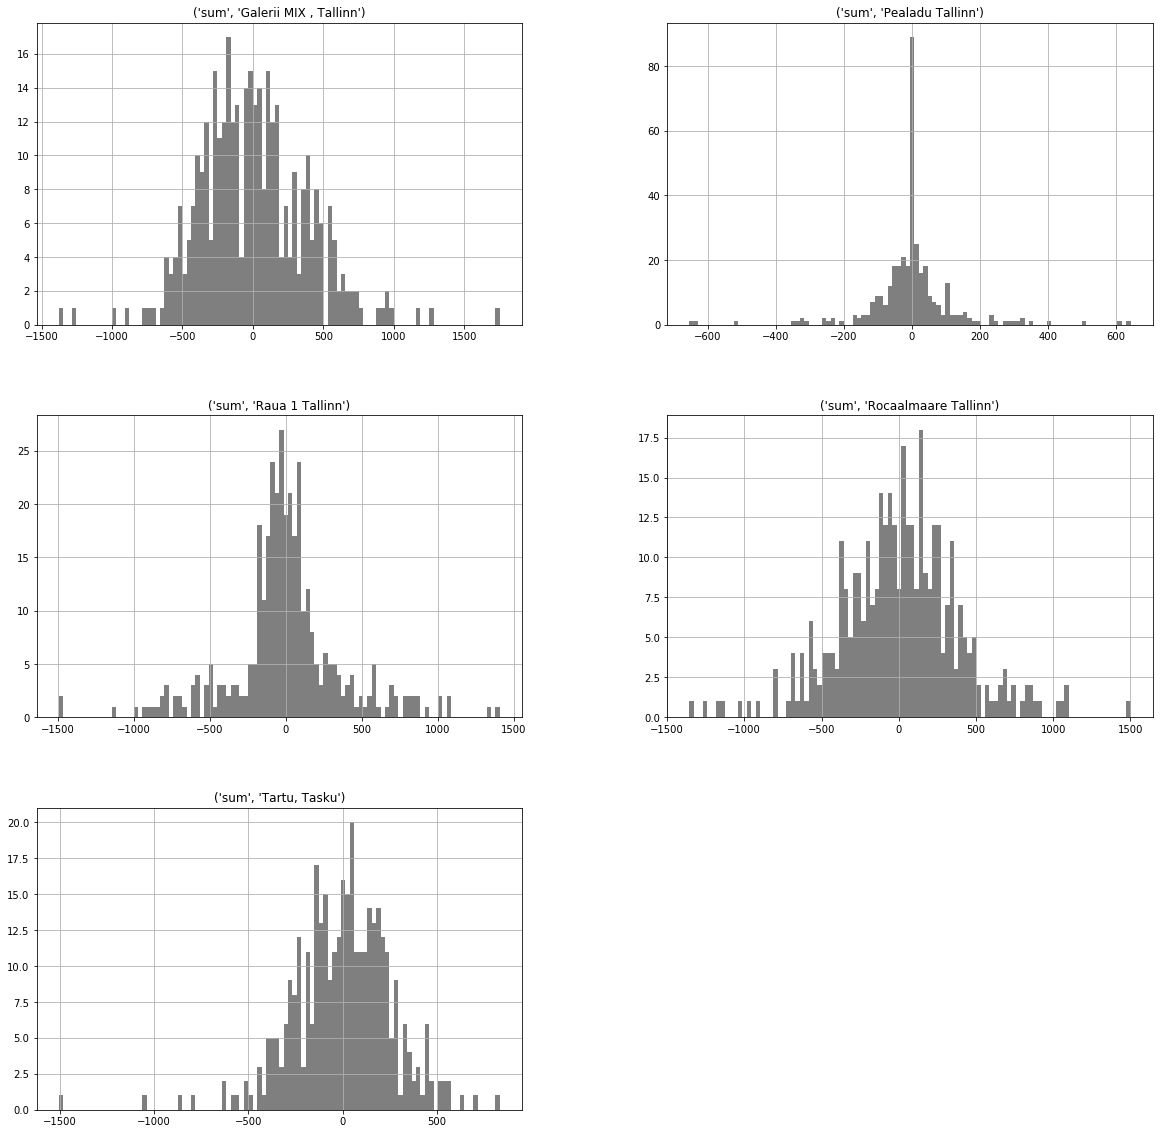

In [10]:
pivot_qty.diff().hist(color='k', alpha=0.5, bins=100, figsize=(20,20))

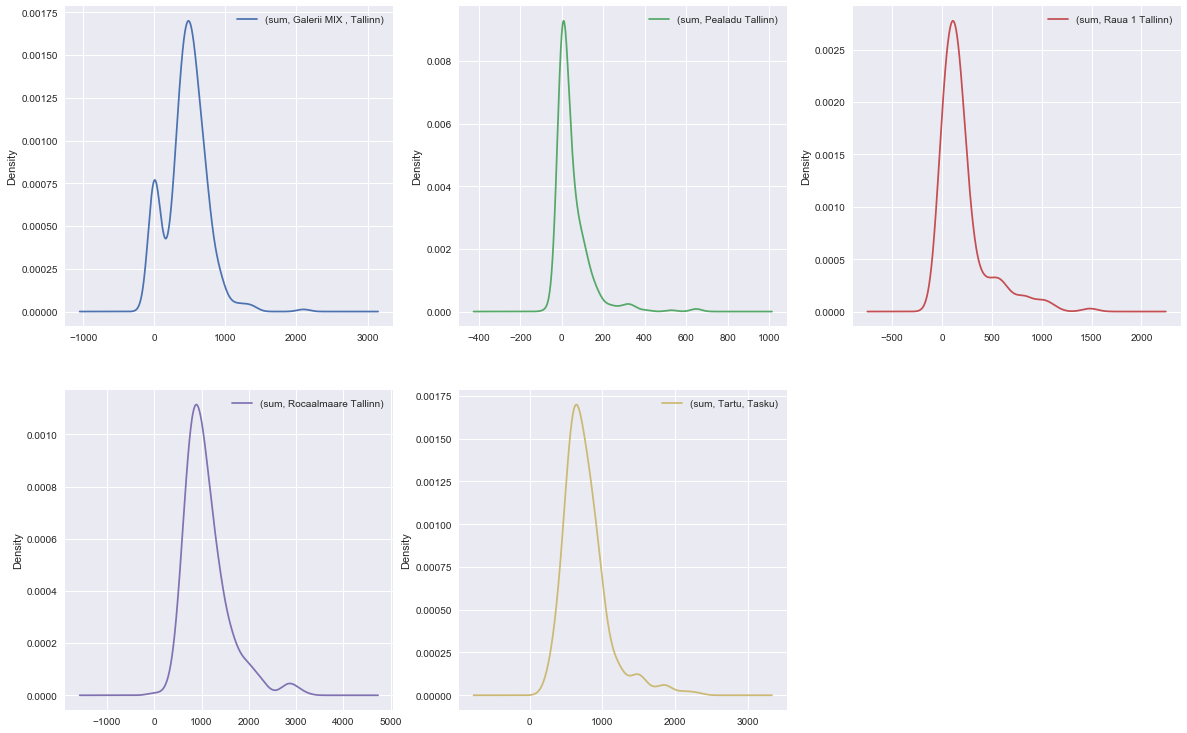

In [74]:
pivot_qty.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20,20))
plt.show()

In [70]:
pd.pivot_table(df[],index=["Kuupдev"], values=['Summa'], aggfunc=[np.sum,len])

,sum,len
,Summa,Summa
Kuupдev,,
2011-01-02,569.64,171.0
2011-01-03,638.27,161.0
2011-01-04,474.74,140.0
2011-01-05,517.72,129.0
2011-01-06,1009.65,211.0
2011-01-07,2478.34,147.0
2011-01-08,856.40,219.0
2011-01-09,531.27,183.0


In [167]:
pivot_qty = pd.pivot_table(df[df['Year']==2015][df['D1tyyp']=='Eraisik'], values='Summa', index=[u'Kuupдev'],
                     columns=['ID'], fill_value = 0, aggfunc=[len])

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [168]:
pivot_qty.head(5)

len                                                              \
ID         3     4     5     6     7     8     9     10    11    12    13      
Kuupдev                                                                        
2015-01-02     1     1     1     0     0     0     0     0     2     0     0   
2015-01-03     1     0     0     0     1     1     1     0     1     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     1     0     0     0     0     0     0     0     0     1     0   
2015-01-06     0     0     1     0     1     0     0     0     0     0     0   

                                                                              \
ID         14    15    16    17    18    19    20    21    22    23    24      
Kuupдev                                                                        
2015-01-02     0     0     0     0     0     0     0     0     0     0     0   
2015-01-03     0     0     0     0     0     0     1     0     0     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     0     0     0     0     1     0     0     0     0     0     0   
2015-01-06     0     0     0     0     0     0     0     0     0     0     0   

                                                                              \
ID         25    26    27    28    29    30    31    32    33    34    35      
Kuupдev                                                                        
2015-01-02     0     0     0     0     0     0     0     0     0     0     0   
2015-01-03     0     0     0     0     0     0     0     0     0     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     0     0     1     0     0     0     0     0     0     0     0   
2015-01-06     0     0     1     0     0     0     0     0     0     0     2   

                                                                              \
ID         36    37    38    39    41    42    43    44    45    46    47      
Kuupдev                                                                        
2015-01-02     0     0     0     0     0     0     0     0     0     0     0   
2015-01-03     0     0     0     0     1     0     0     0     0     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     0     0     0     1     0     0     0     0     0     0     0   
2015-01-06     0     0     0     0     1     0     0     0     0     0     0   

                                                ...                           \
ID         48    49    50    51    52    54     ...  63489 63490 63491 63492   
Kuupдev                                         ...                            
2015-01-02     0     0     0     0     0     0  ...      0     0     0     0   
2015-01-03     0     0     1     0     0     0  ...      0     0     0     0   
2015-01-04     0     0     1     0     0     0  ...      0     0     0     0   
2015-01-05     0     0     0     0     0     0  ...      0     0     0     0   
2015-01-06     0     0     0     0     0     0  ...      0     0     0     0   

                                                                              \
ID         63493 63494 63513 63514 63515 63531 63532 63536 63537 63538 63539   
Kuupдev                                                                        
2015-01-02     0     0     0     0     0     0     0     0     0     0     0   
2015-01-03     0     0     0     0     0     0     0     0     0     0     0   
2015-01-04     0     0     0     0     0     0     0     0     0     0     0   
2015-01-05     0     0     0     0     0     0     0     0     0     0     0   
2015-01-06     0     0     0     0     0     0     0     0     0     0     0   

                                                                              \
ID         63540 63545 63546 63547 63548 63549 63550 63551 63552 63568 63571   
Kuupдev

In [148]:
pivot_qty.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-11',
               ...
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name=u'Kuupдev', length=362, freq=None)

In [147]:
columns = list(pivot_qty.columns.levels[1])

In [169]:
df_2015_ids = pd.DataFrame(index = pivot_qty.index, columns=[3,4,5])
for i, col in enumerate(columns):
    df_2015_ids[col] = pivot_qty.ix[:,i]

In [170]:
df_2015_ids.head(5)

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,50,51,52,54,...,63489,63490,63491,63492,63493,63494,63513,63514,63515,63531,63532,63536,63537,63538,63539,63540,63545,63546,63547,63548,63549,63550,63551,63552,63568,63571,63572,63573,63677,63679,63681,63684,63685,63686,63687,63688,63689,63690,63692,63708,63709,63710,63711,63712,63713,63714,63715,63716,63717,63718
Kuupдev,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-03,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-05,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-06,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
(df_2015_ids[df_2015_ids > 0].count() > 50).values

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [172]:
df_2015_ids.loc[:,(df_2015_ids[df_2015_ids > 0].count() > 50).values]

,3,4,5,6,8,11,27,28,42,46,62,63,73,74,75,76,78,87,88,92,100,103,110,111,114,124,128,129,155,156,161,258,315,377,378,379,391,392,393,394,396,397,398,401,403,404,405,407,408,409,...,56061,56062,56063,56064,56065,56066,56182,56183,56196,56329,56330,56334,56490,56517,56518,56807,56808,56810,56854,56855,56857,56942,57352,57353,57394,57403,58080,58561,58562,58563,58650,59199,59455,59456,59458,59459,59460,59461,59462,59463,59464,59465,59467,59473,59483,59513,59517,60067,60069,60070
Kuupдev,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1,1,1,0,0,2,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,1,0,0,1,1,0,0,0,0,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-03,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-04,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-05,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,2,1,0,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,1,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-06,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,...,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-07,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-08,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,2,1,1,1,0,0,1,0,0,1,1,2,0,1,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-09,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-10,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,3,0,0,1,0,0,0,0,0,1,1,1,1,0,2,1,2,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [173]:
pivot_qty_corr = df_2015_ids.loc[:,df_2015_ids[df_2015_ids > 0].count().values > 50].corr() #method='spearman'

In [174]:
pivot_qty_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 3 to 60070
Columns: 804 entries, 3 to 60070
dtypes: float64(804)
memory usage: 4.9 MB


In [175]:
pivot_qty_corr.to_pickle('pivot_inv-count_count-more50_corr.pkl')
#pivot_qty_corr = pd.read_pickle('pivot_inv-qty_count-more120_corr.pkl')

In [176]:
abs(pivot_qty_corr).head(5)

,3,4,5,6,8,11,27,28,42,46,62,63,73,74,75,76,78,87,88,92,100,103,110,111,114,124,128,129,155,156,161,258,315,377,378,379,391,392,393,394,396,397,398,401,403,404,405,407,408,409,...,56061,56062,56063,56064,56065,56066,56182,56183,56196,56329,56330,56334,56490,56517,56518,56807,56808,56810,56854,56855,56857,56942,57352,57353,57394,57403,58080,58561,58562,58563,58650,59199,59455,59456,59458,59459,59460,59461,59462,59463,59464,59465,59467,59473,59483,59513,59517,60067,60069,60070
3,1.000000,0.085820,0.000818,0.153585,0.127543,0.182177,0.048583,0.040059,0.044991,0.109290,0.129623,0.015836,0.165969,0.013106,0.015418,0.071992,0.054461,0.073570,0.067634,0.000607,0.016116,0.087969,0.049014,0.045654,0.040277,0.007300,0.035049,0.059155,0.061672,0.043020,0.000898,0.050684,0.027488,0.019600,0.007513,0.015241,0.160050,0.133051,0.018238,0.035935,0.095241,0.082916,0.084280,0.007679,0.036369,0.011652,0.045874,0.017636,0.047499,0.022974,...,0.071999,0.015840,0.027769,0.012968,0.153207,0.061994,0.132230,0.017575,0.137197,0.019893,0.079848,0.084182,0.035915,0.035239,0.045450,0.019894,0.068771,0.025942,0.088241,0.112214,0.009852,0.003261,0.024049,0.000027,0.025072,0.016068,0.028196,0.009040,0.033615,0.016385,0.009467,0.093986,0.048967,0.100274,0.012396,0.045117,0.013969,0.116826,0.012265,0.093282,0.059618,0.077335,0.063644,0.079233,0.083550,0.065313,0.012403,0.018475,0.056400,0.086986
4,0.085820,1.000000,0.046455,0.041215,0.024601,0.067520,0.100118,0.041527,0.131092,0.072996,0.063030,0.001313,0.004611,0.001103,0.039715,0.107211,0.027352,0.014365,0.043549,0.037452,0.052253,0.015399,0.010341,0.012319,0.089077,0.080041,0.023324,0.015808,0.085726,0.016612,0.017277,0.001908,0.014039,0.014924,0.059386,0.061456,0.014202,0.003020,0.034390,0.050014,0.010640,0.097488,0.066322,0.060908,0.005345,0.001198,0.063268,0.027921,0.022893,0.052820,...,0.003244,0.003281,0.023305,0.013322,0.026311,0.029695,0.041686,0.089647,0.052555,0.082047,0.032036,0.073954,0.072687,0.039627,0.035180,0.048790,0.010362,0.003356,0.056863,0.045610,0.027745,0.052966,0.117940,0.019739,0.064402,0.088756,0.031708,0.002245,0.029796,0.075699,0.020881,0.033257,0.013371,0.009047,0.069442,0.056562,0.025337,0.055381,0.043965,0.073700,0.062952,0.047978,0.005306,0.048399,0.087634,0.124490,0.013899,0.001611,0.009498,0.054513
5,0.000818,0.046455,1.000000,0.063107,0.045321,0.103892,0.163413,0.137179,0.078339,0.130659,0.032561,0.058012,0.014910,0.066834,0.092673,0.053861,0.024735,0.046781,0.109060,0.067531,0.062986,0.032274,0.037765,0.034441,0.012791,0.075744,0.143313,0.057730,0.104316,0.013336,0.042877,0.096326,0.064725,0.065223,0.069694,0.017841,0.023052,0.046093,0.000494,0.029904,0.029887,0.035915,0.020234,0.033712,0.059213,0.053861,0.004410,0.003377,0.028617,0.011806,...,0.004905,0.050703,0.090720,0.003723,0.078265,0.017250,0.066125,0.057334,0.046342,0.045211,0.045133,0.035508,0.038863,0.051167,0.006722,0.062734,0.058852,0.012257,0.022457,0.084992,0.017722,0.024412,0.019197,0.022799,0.004905,0.021855,0.033911,0.074442,0.024336,0.030306,0.022340,0.056468,0.047405,0.074928,0.049316,0.027111,0.031240,0.055114,0.013237,0.003403,0.082768,0.028989,0.086905,0.035054,0.002920,0.019405,0.078232,0.026676,0.009526,0.024568
6,0.153585,0.041215,0.063107,1.000000,0.286507,0.145838,0.080269,0.216004,0.232571,0.047510,0.163952,0.038851,0.023810,0.039299,0.052885,0.036608,0.048833,0.027393,0.077399,0.037120,0.039538,0.060469,0.064016,0.116655,0.047491,0.051633,0.044057,0.116956,0.050705,0.023220,0.027896,0.101106,0.084387,0.023009,0.012550,0.007179,0.163043,0.085688,0.032558,0.144600,0.116573,0.191191,0.007209,0.138545,0.048050,0.091368,0.075543,0.052195,0.054861,0.018931,...,0.024987,0.031351,0.017709,0.034264,0.030148,0.066116,0.021658,0.050236,0.070009,0.045953,0.013168,0.043523,0.039456,0.020589,0.065296,0.064019,0.000096,0.102567,0.004201,0.016680,0.032361,0.099084,0.023613,0.090886,0.030620,0.036557,0.057888,0.004698,0.029216,0.009029,0.047959,0.072531,0.065729,0.055432,0.068091,0.061049,0.090477,0.072500,0.06

In [183]:
min_level = 0.5
best_corrs = pd.DataFrame(columns=['ID0','ID','corr_abs','corr'])
for i in pivot_qty_corr.columns:
    y = abs(pivot_qty_corr.loc[pivot_qty_corr.index[pivot_qty_corr.index !=i],i]).sort_values(ascending=False)
    if abs(y.values[0] > min_level):
        dx = pd.DataFrame(columns=['ID0','ID','corr_abs','corr'])
        dx['ID'] = y[y>min_level].index.values
        dx['ID0'] = i
        dx['corr_abs'] = y[y>min_level].values
        dx['corr'] = pivot_qty_corr.loc[dx['ID'].values,i].values
        best_corrs = best_corrs.append(dx, ignore_index=True)
        #print(i)
        #print(abs(pivot_qty_corr.loc[pivot_qty_corr.index[pivot_qty_corr.index !=i],i]).sort_values(ascending=False)[:5])
best_corrs['ID0'] = best_corrs['ID0'].astype('int')
best_corrs['ID'] = best_corrs['ID'].astype('int')

In [184]:
best_corrs

,ID0,ID,corr_abs,corr
0,12266,56001,0.559640,0.559640
1,14368,14369,0.503864,0.503864
2,14369,14368,0.503864,0.503864
3,29586,29587,0.621354,0.621354
4,29587,29586,0.621354,0.621354
5,56001,12266,0.559640,0.559640
6,60069,60070,0.500670,0.500670
7,60070,60069,0.500670,0.500670


In [185]:
df[df['Year']==2015][df['ID']==29587] #52268 = Palett plastm.10(15,5x21cm); 11929 = Kummiliim 50ml.

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Kuupдev,Operatsioon,AltkontoD1,AltkontoD2,AltkontoK1,AltkontoK2,AltkontoK3,Kogus,Summa,Val,SumVal,D1kod,D1regnr,D1tyyp,D1riik,D1GlubKredita,D1VAT,D1discont,D1Hinnad,K1kod,Код,Наименование,Розн_Цена,Опт_Цена,Прих_Цена,БазоваяЕдиница,ВалютаПрод,ВалютаЗакуп,Минимум,СтавкаНСО,Производитель,ШтрихКод,Страна,Поставщик,Емкость,Вес,КолВУпаковке,ВесУпаковки,ПродЦенаСНСО,Шифр,БезПартий,EKN,Цена2,Цена2СНСО,NameVene,NameEng,ISSA,LaduKoht,ДатаПослПрихода,НеУчитыватьВПрайс,Selgitus,SelgitusEng,SelgitusVene,FotoName,FotoName2,FotoName3,GUID,ID,КраткоеНаименование,АдресХраненияНаСкладе,ДатаИзменений,DocType,DocNum,DocNum2,DocDate2,Year,Month,Day,Weekday
707539,2015-01-02,Arve/saateleht Ast-013432,Rock-Al-Mare kauplus,Ast-013432 (02.01.15),"Liimipulgad 12tk,Stamperia",Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,2.13,EUR,2.13,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217010,9.919217e+09,"Liimipulgad 12tk,Stamperia",0.0,125.0,1.064,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130815,Italy,Stamperia S.R.L.,0.0,0.19,0.0,0.0,0.0,KRH01R,0.0,35061000,2.13,2.55,Клей для Клеевого пистолета Stamperia,"Reffil stick fort glue gun,Stamperia",,,. .,0.0,171,1,1,,,,58237043-EF09-4DF6-92EF-012DA2078D0A,29587,"Liimipulgad 12tk,Stamperia",,. .,Arve/saateleht,Ast-013432,Ast-013432,02.01.15,2015,1,2,4
708224,2015-01-03,Arve/saateleht Ast-013434,Rock-Al-Mare kauplus,Ast-013434 (03.01.15),"Liimipulgad 12tk,Stamperia",Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,2.13,EUR,2.13,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217010,9.919217e+09,"Liimipulgad 12tk,Stamperia",0.0,125.0,1.064,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130815,Italy,Stamperia S.R.L.,0.0,0.19,0.0,0.0,0.0,KRH01R,0.0,35061000,2.13,2.55,Клей для Клеевого пистолета Stamperia,"Reffil stick fort glue gun,Stamperia",,,. .,0.0,171,1,1,,,,58237043-EF09-4DF6-92EF-012DA2078D0A,29587,"Liimipulgad 12tk,Stamperia",,. .,Arve/saateleht,Ast-013434,Ast-013434,03.01.15,2015,1,3,5
708483,2015-01-03,Arve/saateleht Ast-150018,GALERIIMIX,Ast-150018 (03.01.15),"Liimipulgad 12tk,Stamperia","Galerii MIX , Tallinn",Pхhikдibe 18 -20 %,1.0,2.13,EUR,2.13,520/1204,,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217010,9.919217e+09,"Liimipulgad 12tk,Stamperia",0.0,125.0,1.064,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130815,Italy,Stamperia S.R.L.,0.0,0.19,0.0,0.0,0.0,KRH01R,0.0,35061000,2.13,2.55,Клей для Клеевого пистолета Stamperia,"Reffil stick fort glue gun,Stamperia",,,. .,0.0,171,1,1,,,,58237043-EF09-4DF6-92EF-012DA2078D0A,29587,"Liimipulgad 12tk,Stamperia",,. .,Arve/saateleht,Ast-150018,Ast-150018,03.01.15,2015,1,3,5
709939,2015-01-05,Arve/saateleht Ast-150052,Rock-Al-Mare kauplus,Ast-150052 (05.01.15),"Liimipulgad 12tk,Stamperia",Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,2.03,EUR,2.03,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217010,9.919217e+09,"Liimipulgad 12tk,Stamperia",0.0,125.0,1.064,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130815,Italy,Stamperia S.R.L.,0.0,0.19,0.0,0.0,0.0,KRH01R,0.0,35061000,2.13,2.55,Клей для Клеевого пистолета Stamperia,"Reffil stick fort glue gun,Stamperia",,,. .,0.0,171,1,1,,,,58237043-EF09-4DF6-92EF-012DA2078D0A,29587,"Liimipulgad 12tk,Stamperia",,. .,Arve/saateleht,Ast-150052,Ast-150052,05.01.15,2015,1,5,0
710802,2015-01-06,Arve/saateleht Ast-150053,Rock-Al-Mare kauplus,Ast-150053 (06.01.15),"Liimipulgad 12tk,Stamperia",Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,2.13,EUR,2.13,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217010,9.919217e+09,"Liimipulgad 12tk,Stamperia",0.0,125.0,1.064,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130815,Italy,Stamperia S.R.L.,0.0,0.19,0.0,0.0,0.0,KRH01R,0.0,35061000,2.13,2.55,Клей для Клеевого пистолета Stamperia,"Reffil stick fort glue gun,Stamperia",,,. .,0.0,171,1,1,,,,58237043-EF09-4DF6-92EF-012DA2078D0A,29587,"Liimipulgad 12tk,Stamperia",,. .,Arve/saateleht,Ast-150053,Ast-150053,06.01.15,2015,1,6,1
715277,2015-01-13,Arve/saateleht Ast-150021,Kalifeks SIA,Ast-150021 (13.01.15),"Liimipulgad 12tk,Stamperia",Pealadu Tallinn,

In [186]:
df[df['Year']==2015][df['ID']==29586]

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Kuupдev,Operatsioon,AltkontoD1,AltkontoD2,AltkontoK1,AltkontoK2,AltkontoK3,Kogus,Summa,Val,SumVal,D1kod,D1regnr,D1tyyp,D1riik,D1GlubKredita,D1VAT,D1discont,D1Hinnad,K1kod,Код,Наименование,Розн_Цена,Опт_Цена,Прих_Цена,БазоваяЕдиница,ВалютаПрод,ВалютаЗакуп,Минимум,СтавкаНСО,Производитель,ШтрихКод,Страна,Поставщик,Емкость,Вес,КолВУпаковке,ВесУпаковки,ПродЦенаСНСО,Шифр,БезПартий,EKN,Цена2,Цена2СНСО,NameVene,NameEng,ISSA,LaduKoht,ДатаПослПрихода,НеУчитыватьВПрайс,Selgitus,SelgitusEng,SelgitusVene,FotoName,FotoName2,FotoName3,GUID,ID,КраткоеНаименование,АдресХраненияНаСкладе,ДатаИзменений,DocType,DocNum,DocNum2,DocDate2,Year,Month,Day,Weekday
708223,2015-01-03,Arve/saateleht Ast-013434,Rock-Al-Mare kauplus,Ast-013434 (03.01.15),"Liimipьstol,Stamperia",Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,5.33,EUR,5.33,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217009,9.919217e+09,"Liimipьstol,Stamperia",0.0,125.0,2.192,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130808,Italy,Stamperia S.R.L.,0.0,0.22,0.0,0.0,0.0,KRH01,0.0,35061000,5.33,6.4,Клеевой пистолет Stamperia,"Hot glue gun,Stamperia",,,. .,0.0,168,1,1,,,,DDBD2A1C-8598-4CC5-99F7-924D93BE2547,29586,"Liimipьstol,Stamperia",,24.05.16,Arve/saateleht,Ast-013434,Ast-013434,03.01.15,2015,1,3,5
709824,2015-01-05,Arve/saateleht Ast-150051,Rock-Al-Mare kauplus,Ast-150051 (05.01.15),"Liimipьstol,Stamperia",Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,5.33,EUR,5.33,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217009,9.919217e+09,"Liimipьstol,Stamperia",0.0,125.0,2.192,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130808,Italy,Stamperia S.R.L.,0.0,0.22,0.0,0.0,0.0,KRH01,0.0,35061000,5.33,6.4,Клеевой пистолет Stamperia,"Hot glue gun,Stamperia",,,. .,0.0,168,1,1,,,,DDBD2A1C-8598-4CC5-99F7-924D93BE2547,29586,"Liimipьstol,Stamperia",,24.05.16,Arve/saateleht,Ast-150051,Ast-150051,05.01.15,2015,1,5,0
710803,2015-01-06,Arve/saateleht Ast-150053,Rock-Al-Mare kauplus,Ast-150053 (06.01.15),"Liimipьstol,Stamperia",Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,5.33,EUR,5.33,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217009,9.919217e+09,"Liimipьstol,Stamperia",0.0,125.0,2.192,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130808,Italy,Stamperia S.R.L.,0.0,0.22,0.0,0.0,0.0,KRH01,0.0,35061000,5.33,6.4,Клеевой пистолет Stamperia,"Hot glue gun,Stamperia",,,. .,0.0,168,1,1,,,,DDBD2A1C-8598-4CC5-99F7-924D93BE2547,29586,"Liimipьstol,Stamperia",,24.05.16,Arve/saateleht,Ast-150053,Ast-150053,06.01.15,2015,1,6,1
718732,2015-01-17,Arve/saateleht Ast-150208,Rock-Al-Mare kauplus,Ast-150208 (17.01.15),"Liimipьstol,Stamperia",Rocaalmaare Tallinn,Pхhikдibe 18 -20 %,1.0,9.30,EUR,9.30,520/932,,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217009,9.919217e+09,"Liimipьstol,Stamperia",0.0,125.0,2.192,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130808,Italy,Stamperia S.R.L.,0.0,0.22,0.0,0.0,0.0,KRH01,0.0,35061000,5.33,6.4,Клеевой пистолет Stamperia,"Hot glue gun,Stamperia",,,. .,0.0,168,1,1,,,,DDBD2A1C-8598-4CC5-99F7-924D93BE2547,29586,"Liimipьstol,Stamperia",,24.05.16,Arve/saateleht,Ast-150208,Ast-150208,17.01.15,2015,1,17,5
720106,2015-01-19,Arve/saateleht Ast-150191,Kalifeks SIA,Ast-150191 (19.01.15),"Liimipьstol,Stamperia",Pealadu Tallinn,Kaubakдibe Ьhendusesisene 0 %,12.0,41.52,EUR,41.52,880/674/566,LV40003164771,Firma,Lati,0.0,1.0,0.0,,53/1/9919217009,9.919217e+09,"Liimipьstol,Stamperia",0.0,125.0,2.192,tk,EEK,EUR,0.0,18 - 20 %,Stamperia S.R.L.,8024273130808,Italy,Stamperia S.R.L.,0.0,0.22,0.0,0.0,0.0,KRH01,0.0,35061000,5.33,6.4,Клеевой пистолет Stamperia,"Hot glue gun,Stamperia",,,. .,0.0,168,1,1,,,,DDBD2A1C-8598-4CC5-99F7-924D93BE2547,29586,"Liimipьstol,Stamperia",,24.05.16,Arve/saateleht,Ast-150191,Ast-150191,19.01.15,2015,1,19,0
720598,2015-01-19,Arve/saateleht Ast-150305,Tasku kauplus,Ast-150305 (19.01.15),"Liimipьstol,Stamperia","Tartu, Tasku",Pхhikдibe 18 -20 %,1.0,5.33,EUR,5.33,520/1399,0,Eraisik,Estonia,0.0,1.0,0.0,,53/1/9919217009,9.919217e+09,"Liimipьstol,Stamperia",0.0,125.0,2.192,tk,EEK,EUR,0.0,18 - 20 

In [189]:
a1 = df_2015_ids.loc[:,29587].values

In [190]:
a2 = df_2015_ids.loc[:,29586].values

In [191]:
np.corrcoef(a1,a2)

array([[ 1.        ,  0.62135401],
       [ 0.62135401,  1.        ]])

In [192]:
import scipy
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [193]:
pearsonr(a1,a2)

(0.62135401020724623, 4.8784167667803903e-40)

In [194]:
spearmanr(a1, a2)

SpearmanrResult(correlation=0.56465082331926275, pvalue=7.1632405085319137e-32)

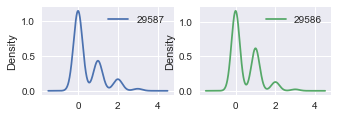

In [200]:
df_2015_ids[[29587,29586]].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

In [196]:
import seaborn
# для показа сгенерированных картинок используем matplotlib
import matplotlib.pyplot as plt

In [197]:
plt.figure(figsize = (80,40), dpi=100)  # размеры в дюймах

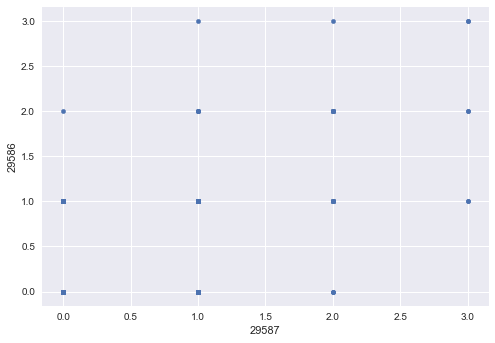

In [201]:
df_2015_ids.plot(x=29587, y=29586, kind='scatter')

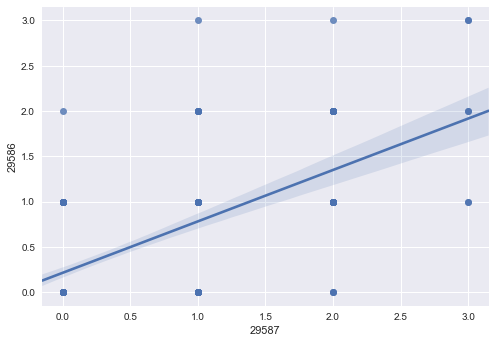

In [202]:
seaborn.regplot(x=df_2015_ids[29587], y=df_2015_ids[29586])
plt.show()

In [70]:
min_level = 0.5
best_corrs = pd.DataFrame(columns=['ID0','ID','corr_abs','corr'])
for i in pivot_qty_corr.columns:
    y = abs(pivot_qty_corr.loc[pivot_qty_corr.index[pivot_qty_corr.index !=i],i]).sort_values(ascending=False)
    if abs(y.values[0] > min_level):
        dx = pd.DataFrame(columns=['ID0','ID','corr_abs','corr'])
        dx['ID'] = y[y>min_level].index.values
        dx['ID0'] = i
        dx['corr_abs'] = y[y>min_level].values
        dx['corr'] = pivot_qty_corr.loc[dx['ID'].values,i].values
        best_corrs = best_corrs.append(dx, ignore_index=True)
        #print(i)
        #print(abs(pivot_qty_corr.loc[pivot_qty_corr.index[pivot_qty_corr.index !=i],i]).sort_values(ascending=False)[:5])
best_corrs['ID0'] = best_corrs['ID0'].astype('int')
best_corrs['ID'] = best_corrs['ID'].astype('int')

In [74]:
best_corrs

,ID0,ID,corr_abs,corr
0,2886,55895,0.505494,0.505494
1,2886,6193,0.504845,0.504845
2,6193,2886,0.504845,0.504845
3,10207,10208,0.584303,0.584303
4,10208,10209,0.594552,0.594552
5,10208,10207,0.584303,0.584303
6,10209,10208,0.594552,0.594552
7,12266,56001,0.716351,0.716351
8,29586,29587,0.600369,0.600369
9,29587,29586,0.600369,0.600369


In [82]:
b1 = pivot_qty.loc[:,56001].values
b1[b1>0]

array([  6.50000000e+00,   2.75000000e+01,   5.00000000e+00,
         4.00000000e+00,   2.40000000e+01,   6.00000000e+00,
         3.00000000e+00,   2.00000000e+00,   1.15000000e+01,
         4.00000000e+00,   2.00000000e+00,   6.00000000e+00,
         1.00000000e+00,   6.00000000e+00,   1.00000000e+01,
         4.00000000e+00,   1.10000000e+01,   1.90000000e+01,
         1.50000000e+00,   4.00000000e+00,   4.00000000e+00,
         2.00000000e+01,   3.60000000e+01,   1.00000000e+00,
         6.00000000e+00,   8.00000000e+00,   3.00000000e+00,
         2.60000000e+01,   3.00000000e+01,   1.10000000e+01,
         1.00000000e+00,   7.00000000e+00,   1.00000000e+00,
         6.00000000e+00,   6.00000000e+00,   2.10000000e+01,
         1.00000000e+00,   1.60000000e+01,   3.00000000e+00,
         1.80000000e+01,   5.40000000e+01,   1.00000000e+02,
         1.60000000e+01,   1.10000000e+01,   1.40000000e+01,
         8.00000000e+00,   6.00000000e+00,   3.00000000e+00,
         5.00000000e+00,

In [83]:
b2 = pivot_qty.loc[:,12266].values
b2[b2>0]

array([  15.5,   20. ,    5. ,    2. ,    5.5,   15. ,    2. ,    2. ,
          1. ,    1. ,    2. ,    2. ,    3. ,    7.5,   13. ,    9. ,
         25. ,    4. ,    1. ,    8. ,   24. ,   20. ,    6. ,    6. ,
          4. ,   20. ,    6. ,    2. ,    7. ,    3. ,   10. ,    2. ,
          8. ,   14. ,   20. ,   41. ,    8. ,    6.5,    4. ,    5. ,
          1. ,    2. ,   16. ,    6. ,   15. ,    4.5,    4.5,    1. ,
         11. ,    4. ,   16. ,   10. ,    6. ,   12. ,    7. ,    3. ,
          2. ,    6. ,    3. ,    2.5,    2. ,    6. ,    5. ,    7. ,
          6. ,    5.5,    5.5,   40. ,    1. ,  700. ,    4. ,   10. ,
         11. ,   41. ,   15. ,    3. ,   12. ,    7. ,    4. ,    2. ,
         12.5,    1. ,    3. ,    4. ,   12. ,    6. ,   11. ,   19. ,
         11. ,   12. ,    4. ,   10. ,    9. ,   20. ,    4. ,   14. ,
         11.5,    2. ,    4. ,    8. ,    7.5,   13. ,   13. ,   22.5,
        580. ,    2. ,    4. ,    6. ,    1. ,    4. ,    9. ,   22.5,
      

In [90]:
pivot_qty.loc[:,12266][b2<500].values

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

TypeError: slice indices must be integers or None or have an __index__ method

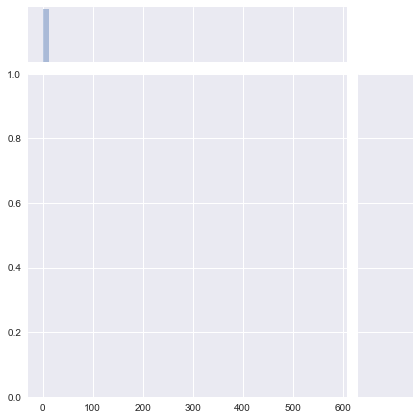

In [91]:
seaborn.jointplot(x=df_2015_ids.loc[:,12266].values[b1<350], y=pivot_qty.loc[:,12266].values[b2<500], kind='reg')
plt.show()

In [67]:
pivot_qty = pd.pivot_table(df[df['Year']==2015], values='Kogus', index=['Kuupдev', 'AltkontoD1'],
                     columns=['ID'], fill_value = 0)

In [68]:
pivot_qty.head(5)

ID                           3      4      5      6      7      8      9      \
Kuupдev    AltkontoD1                                                          
2015-01-01 BDP Eesti OЬ          0    0.0      0      0      0      0      0   
2015-01-02 AZUL OЬ               0    0.0      0      0      0      0      0   
           Aniita Design OЬ      0    0.0      0      0      0      0      0   
           Eraisik               0    0.0      0      0      0      0      0   
           GALERIIMIX            0    1.0      0      0      0      0      0   

ID                           10     11     12     13     14     15     16     \
Kuupдev    AltkontoD1                                                          
2015-01-01 BDP Eesti OЬ          0      0      0      0      0      0      0   
2015-01-02 AZUL OЬ               0      0      0      0      0      0      0   
           Aniita Design OЬ      0      0      0      0      0      0      0   
           Eraisik               0      0      0      0      0      0      0   
           GALERIIMIX            0      0      0      0      0      0      0   

ID                           17     18     19     20     21     22     23     \
Kuupдev    AltkontoD1                                                          
2015-01-01 BDP Eesti OЬ        0.0      0      0    0.0      0      0      0   
2015-01-02 AZUL OЬ             0.0      0      0    0.0      0      0      0   
           Aniita Design OЬ    0.0      0      0    0.0      0      0      0   
           Eraisik             0.0      0      0    0.0      0      0      0   
           GALERIIMIX          0.0      0      0    0.0      0      0      0   

ID                           24     25     26     27     28     29     30     \
Kuupдev    AltkontoD1                                                          
2015-01-01 BDP Eesti OЬ          0      0      0      0      0      0      0   
2015-01-02 AZUL OЬ               0      0      0      0      0      0      0   
           Aniita Design OЬ      0      0      0      0      0      0      0   
           Eraisik               0      0      0      0      0      0      0   
           GALERIIMIX            0      0      0      0      0      0      0   

ID                           31     32     33     34     35     36     37     \
Kuupдev    AltkontoD1                                                          
2015-01-01 BDP Eesti OЬ          0      0      0      0      0      0      0   
2015-01-02 AZUL OЬ               0      0      0      0      0      0      0   
           Aniita Design OЬ      0      0      0      0      0      0      0   
           Eraisik               0      0      0      0      0      0      0   
           GALERIIMIX            0      0      0      0      0      0      0   

ID                           38     39     41     42     43     44     45     \
Kuupдev    AltkontoD1                                                          
2015-01-01 BDP Eesti OЬ          0      0      0      0      0      0      0   
2015-01-02 AZUL OЬ               0      0      0      0      0      0      0   
           Aniita Design OЬ      0      0      0      0      0      0      0   
           Eraisik               0      0      0      0      0      0      0   
           GALERIIMIX            0      0      0      0      0      0      0   

ID                           46     47     48     49     50     51     52     \
Kuupдev    AltkontoD1                                                          
2015-01-01 BDP Eesti OЬ          0      0      0      0      0      0      0   
2015-01-02 AZUL OЬ               0      0      0      0      0      0      0   
           Aniita Design OЬ      0      0      0      0      0      0      0   
           Eraisik               0      0      0      0      0      0      0   
           GALERIIMIX            0      0      0      0      0      0      0   

ID                           54     ...    63557  63558  63559  63560  63

In [69]:
pivot_qty_corr = pivot_qty.loc[:,pivot_qty[pivot_qty > 0].count().values > 120].corr(method='spearman')

In [68]:
sparse_sales = pd.pivot_table(df[df['Year']==2015], values='Summa', index=['Kuupдev', 'D1tyyp'],
                     columns=['ID'], fill_value = 0)

In [69]:
sparse_sales.head(5)

ID                  3      4      5      6      7      8      9      10     \
Kuupдev    D1tyyp                                                            
2015-01-01 Firma     0.00   0.00   0.00    0.0   0.00   0.00   0.00    0.0   
2015-01-02 Eraisik  19.30   2.83   5.71    0.0   0.00   0.00   0.00    0.0   
           Firma     0.00   0.00   0.00    0.0   0.00   0.00   0.00    0.0   
2015-01-03 Eraisik   2.83   0.00   0.00    0.0   5.71   5.71   3.83    0.0   
2015-01-04 Eraisik   0.00   0.00   0.00    0.0   0.00   0.00   0.00    0.0   

ID                   11     12     13     14     15     16     17     18     \
Kuupдev    D1tyyp                                                             
2015-01-01 Firma     0.000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-02 Eraisik  11.165    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           Firma     0.000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-03 Eraisik   5.670    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-04 Eraisik   0.000    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ID                  19     20     21     22     23     24     25     26     \
Kuupдev    D1tyyp                                                            
2015-01-01 Firma      0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-02 Eraisik    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0   
           Firma      0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-03 Eraisik    0.0   5.71    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-04 Eraisik    0.0   0.00    0.0    0.0    0.0    0.0    0.0    0.0   

ID                  27     28     29     30     31     32     33     34     \
Kuupдev    D1tyyp                                                            
2015-01-01 Firma      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-02 Eraisik    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           Firma      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-03 Eraisik    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015-01-04 Eraisik    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ID                  35     36     37     38     39     41     42     43     \
Kuupдev    D1tyyp                                                            
2015-01-01 Firma      0.0    0.0    0.0    0.0    0.0   0.00    0.0    0.0   
2015-01-02 Eraisik    0.0    0.0    0.0    0.0    0.0   0.00    0.0    0.0   
           Firma      0.0    0.0    0.0    0.0    0.0   0.00    0.0    0.0   
2015-01-03 Eraisik    0.0    0.0    0.0    0.0    0.0   2.83    0.0    0.0   
2015-01-04 Eraisik    0.0    0.0    0.0    0.0    0.0   0.00    0.0    0.0   

ID                  44     45     46     47     48     49     50     51     \
Kuupдev    D1tyyp                                                            
2015-01-01 Firma      0.0    0.0    0.0    0.0    0.0    0.0   0.00    0.0   
2015-01-02 Eraisik    0.0    0.0    0.0    0.0    0.0    0.0   0.00    0.0   
           Firma      0.0    0.0    0.0    0.0    0.0    0.0   0.00    0.0   
2015-01-03 Eraisik    0.0    0.0    0.0    0.0    0.0    0.0   8.83    0.0   
2015-01-04 Eraisik    0.0    0.0    0.0    0.0    0.0    0.0   8.83    0.0   

ID                  52     54     ...    63557  63558  63559  63560  63561  \
Kuupдev    D1tyyp                 ...                                        
2015-01-01 Firma      0.0    0.0  ...      0.0    0.0    0.0    0.0    0.0   
2015-01-02 Eraisik    0.0    0.0  ...      0.0    0.0    0.0    0.0    0.0   
           Firma      0.0    0.0  ...      0.0    0.0    0.0    0.0    0.0   
2015-01-03 Eraisik    0.0    0.0  ...      0.0    0.0    0.0    0.0    0.0   
2015-01-04 Eraisik    0.0    0.0  ...      0.0    0.0    0.0    0.0    0.0   

ID                  63562  63563  63564  63565  63566  63567  63568  63570  \
Kuupдev    D1tyyp                                                            
2015-01-

In [70]:
sales_correlation = sparse_sales.corr()

In [71]:
sales_correlation.head(5)

ID,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,50,51,52,54,...,63557,63558,63559,63560,63561,63562,63563,63564,63565,63566,63567,63568,63570,63571,63572,63573,63574,63575,63576,63577,63578,63579,63580,63581,63582,63583,63584,63677,63679,63681,63684,63685,63686,63687,63688,63689,63690,63692,63708,63709,63710,63711,63712,63713,63714,63715,63716,63717,63718,63727
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1.000000,0.409596,0.167902,0.446419,0.127627,0.315796,0.377254,0.217499,0.229233,0.061565,-0.008662,0.201669,0.068534,0.158799,0.144625,0.231447,0.170767,0.265998,0.054641,0.053718,0.069864,0.421513,0.053984,0.048813,0.251436,0.242381,0.099876,0.104658,0.074105,0.278563,0.149646,0.107754,0.232003,0.089370,0.058502,0.122005,0.277922,0.169305,0.129596,0.148318,0.152445,0.167031,0.077996,0.091276,0.117805,0.154880,0.105295,0.105707,0.182538,-0.019369,...,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.009750,-0.013090,-0.013303,-0.013133,-0.012661,-0.013090,-0.017849,-0.016336,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.013090,-0.018227,-0.013090,-0.013221,0.074693,-0.022138,0.023834,-0.013090,-0.016160,-0.017132,-0.017512,-0.020696,-0.020696,-0.015293,-0.013090,-0.022203,-0.013409,-0.013090,-0.013571,-0.010623,0.006669,-0.014093,-0.013090
4,0.409596,1.000000,0.231868,0.320175,0.199020,0.223051,0.249794,0.295513,0.406431,0.108890,0.199466,0.206305,0.140042,0.170467,0.242566,0.349368,0.088491,0.213108,0.312804,0.222687,0.094694,0.072629,0.070832,0.104086,0.272915,0.428325,0.114113,0.242411,0.046447,0.098984,0.085632,0.026318,0.260286,0.123196,0.090095,0.261033,0.475250,0.224877,0.243521,0.078733,0.150457,0.177493,0.093778,0.330467,0.046960,0.036053,0.150247,0.130745,0.146855,-0.027884,...,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013568,-0.013196,-0.018391,-0.027879,-0.019609,-0.013196,-0.017994,-0.016468,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,-0.013196,0.004829,0.007259,-0.013196,-0.007656,0.074674,-0.011011,0.003824,-0.013196,-0.004089,-0.006411,0.005617,-0.020863,-0.015752,-0.015661,-0.013196,0.008641,-0.022599,-0.013196,-0.010046,-0.027337,-0.018394,-0.014741,-0.013196
5,0.167902,0.231868,1.000000,0.169165,0.206517,0.246352,0.112406,0.319432,0.278822,0.289030,0.043922,0.101759,0.078832,0.097527,0.110101,0.211129,0.312737,0.392972,0.125468,0.314741,0.040064,0.253643,0.239890,0.438014,0.355563,0.140864,0.169072,0.084716,0.170336,0.222854,0.189637,0.194633,0.274636,0.188339,0.158741,0.145196,0.148792,0.107522,0.194664,0.249656,0.105561,0.129227,0.122227,0.113514,0.060374,0.085285,0.298076,0.078776,0.110735,0.027947,...,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.011286,-0.010977,-0.011168,-0.015719,-0.016312,-0.010977,-0.014968,-0.013699,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,-0.010977,0.017119,-0.010977,0.001596,-0.008776,-0.023232,0.044911,0.264897,0.000098,-0.023237,0.002573,0.100525,0.218405,0.196291,-0.010977,0.010396,0.042520,-0.010977,0.067666,0.176329,0.005060,0.208650,-0.010977
6,0.446419,0.320175,0.169165,1.000000,0.141370,0.119517,0.169552,0.240949,0.078873,0.265256,0.257798,0.144589,0.064365,0.072225,0.080704,0.249040,0.044275,0.144114,0.298789,0.070389,0.032496,0.507174,0.065868,0.092942,0.189908,0.375161,0.155592,0.038081,0.157061,0.102894,0.090997,0.122027,0.309381,0.065990,0.079079,0.067205,0.444785,0.096328,0.368269,0.132189,0.162824,0.038907,0.065843,0.041113,0.048213,0.124062,0.097171,0.054093,0.053761,-0.011169,...,0.180357,0.180357,0.180357,0.180357,0.180357,0.180357,0.180357,0.180357,0.180357,0.180357,0.180357,-0.010118,-0.010139,-0.007965,0.051926,-0.0

In [74]:
sales_correlation.shape

(21842, 21842)

In [75]:
sales_correlation.iloc[:12000].to_pickle('sales_correlation-2015_1.pkl')

In [76]:
sales_correlation.iloc[12000:].to_pickle('sales_correlation-2015_2.pkl')

In [72]:
product_ID = 3
sales_correlation[[product_ID]].sort_values(product_ID, ascending = False).head()

ID,3
ID,
3,1.000000
6,0.446419
24,0.421513
4,0.409596
22210,0.392273


In [26]:
pivot_df = pd.pivot_table(df[df['Year']==2015][df['D1tyyp']=='Eraisik'], values=['Summa','Kogus'], index=[u'Kuupдev'],
                     columns=['AltkontoK2'], fill_value = 0, aggfunc=[np.sum, len])

C:\Users\McSim\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [27]:
pivot_df

sum                                 \
                           Summa                                  
AltkontoK2 Galerii MIX , Tallinn Pealadu Tallinn Raua 1 Tallinn   
Kuupдev                                                           
2015-01-02                361.05          127.19          80.12   
2015-01-03                352.95            0.00          97.94   
2015-01-04                  0.00            0.00           0.00   
2015-01-05                569.61          320.95         282.90   
2015-01-06                628.28            4.86         132.03   
2015-01-07                569.08           59.27          95.03   
2015-01-08                354.16          102.76          50.37   
2015-01-09                453.17           99.81         423.17   
2015-01-10                379.55            0.00         114.63   
2015-01-11                  0.00            0.00           0.00   
2015-01-12                433.22           36.80         105.32   
2015-01-13                720.75            3.33           0.00   
2015-01-14                367.27          121.06         224.07   
2015-01-15                532.83           10.07         574.04   
2015-01-16                139.76          101.51         304.67   
2015-01-17                400.39            0.00         178.33   
2015-01-18                  0.00            0.00           0.00   
2015-01-19                548.62          148.45          86.14   
2015-01-20                322.84          164.45         112.90   
2015-01-21                724.02           41.31         624.35   
2015-01-22                460.13           19.91          97.54   
2015-01-23                551.94           39.61          75.27   
2015-01-24                331.10            0.00         191.49   
2015-01-25                  0.00            0.00           0.00   
2015-01-26                479.84           35.23         264.47   
2015-01-27                563.04           41.10         167.48   
2015-01-28                288.95           55.36         585.13   
2015-01-29                384.79            4.66         260.16   
2015-01-30                748.59           48.42         194.91   
2015-01-31                344.64            0.00         488.90   
2015-02-01                  0.00            0.00           0.00   
2015-02-02                368.20          282.29          58.97   
2015-02-03                338.08          128.63         259.49   
2015-02-04                568.15           47.41         131.34   
2015-02-05                561.03           62.35         851.02   
2015-02-06                513.79           13.46         146.24   
2015-02-07                277.45            0.00         594.35   
2015-02-08                  0.00            0.00           0.00   
2015-02-09                666.11           33.39         167.27   
2015-02-10                718.08           65.63          84.08   
2015-02-11                582.59           14.94         414.68   
2015-02-12                716.20           13.01          99.73   
2015-02-13                654.83           31.63         155.75   
2015-02-14                503.04            0.00         160.30   
2015-02-15                  0.00            0.00           0.00   
2015-02-16                975.97          154.39         152.87   
2015-02-17                368.98          102.42         487.20   
2015-02-18                609.34           11.04         333.39   
2015-02-19                591.92           25.67         226.34   
2015-02-20                475.17           31.31         185.81   
...                          ...             ...            ...   
2015-11-11                720.89           94.29         226.49   
2015-11-12                624.28            0.00          98.12   
2015-11-13                670.11           40.75         226.13   
2015-11-14                399.46            0.00         447.68   
2015-11-15                  0.00            0.00           0.00   
2015-11-1

In [29]:
dir(pivot_df)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__

In [35]:
pivot_df.columns

MultiIndex(levels=[['sum', 'len'], ['Summa', 'Kogus'], ['Galerii MIX , Tallinn', 'Pealadu Tallinn', 'Raua 1 Tallinn', 'Rocaalmaare Tallinn', 'Tartu, Tasku']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[None, None, 'AltkontoK2'])

In [60]:
pd.concat(objs=[pivot_df.ix[:,('sum','Summa','Galerii MIX , Tallinn')], pivot_df.ix[:,('sum','Kogus','Galerii MIX , Tallinn')], pivot_df.ix[:,('len','Summa','Galerii MIX , Tallinn')]], axis=1)

sum                                         len
                           Summa                 Kogus                 Summa
           Galerii MIX , Tallinn Galerii MIX , Tallinn Galerii MIX , Tallinn
Kuupдev                                                                     
2015-01-02                361.05                153.00                   113
2015-01-03                352.95                 81.00                    60
2015-01-04                  0.00                  0.00                     0
2015-01-05                569.61                242.00                   158
2015-01-06                628.28                192.00                   129
2015-01-07                569.08                163.20                   132
2015-01-08                354.16                173.00                   117
2015-01-09                453.17                189.53                   110
2015-01-10                379.55                208.00                   115
2015-01-11                  0.00                  0.00                     0
2015-01-12                433.22                199.00                   107
2015-01-13                720.75                262.00                   186
2015-01-14                367.27                160.00                   114
2015-01-15                532.83                351.00                   184
2015-01-16                139.76                 70.00                    59
2015-01-17                400.39                196.00                   135
2015-01-18                  0.00                  0.00                     0
2015-01-19                548.62                298.00                   162
2015-01-20                322.84                127.00                   103
2015-01-21                724.02                240.00                   125
2015-01-22                460.13                251.00                   143
2015-01-23                551.94                210.00                   135
2015-01-24                331.10                140.00                   108
2015-01-25                  0.00                  0.00                     0
2015-01-26                479.84                270.50                   175
2015-01-27                563.04                241.00                   127
2015-01-28                288.95                186.00                   118
2015-01-29                384.79                245.00                   129
2015-01-30                748.59                288.30                   191
2015-01-31                344.64                171.20                   108
2015-02-01                  0.00                  0.00                     0
2015-02-02                368.20                218.00                   148
2015-02-03                338.08                180.68                   129
2015-02-04                568.15                288.54                   172
2015-02-05                561.03                290.58                   175
2015-02-06                513.79                219.00                   161
2015-02-07                277.45                132.00                    97
2015-02-08                  0.00                  0.00                     0
2015-02-09                666.11                367.00                   238
2015-02-10                718.08                413.65                   232
2015-02-11                582.59                323.00                   192
2015-02-12                716.20                385.15                   204
2015-02-13                654.83                367.22                   197
2015-02-14                503.04                190.65                   121
2015-02-15                  0.00                  0.00                     0
2015-02-16                975.97                312.20                   182
2015-02-17                368.98                276.00                   116
2015-02-18                609.34                259.70                   159
2015-02-19               

In [186]:
print(df.D1kod.str.count('/').min())
print(df.D1kod.str.count('/').max())
print(df.K1kod.str.count('/').min())
print(df.K1kod.str.count('/').max())

1
2
1
5


In [10]:
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
#plt.figure(figsize=(20,10))
df_pivot_summa = pd.pivot_table(df, values='Summa', index=['Kuupдev'], columns=['D1tyyp'], aggfunc=np.sum).fillna(0)

In [16]:
df_pivot_summa['Total'] = df_pivot_summa.sum(axis=1)

In [29]:
df_pivot_summa['Weekday'] = df_pivot_summa.index.weekday

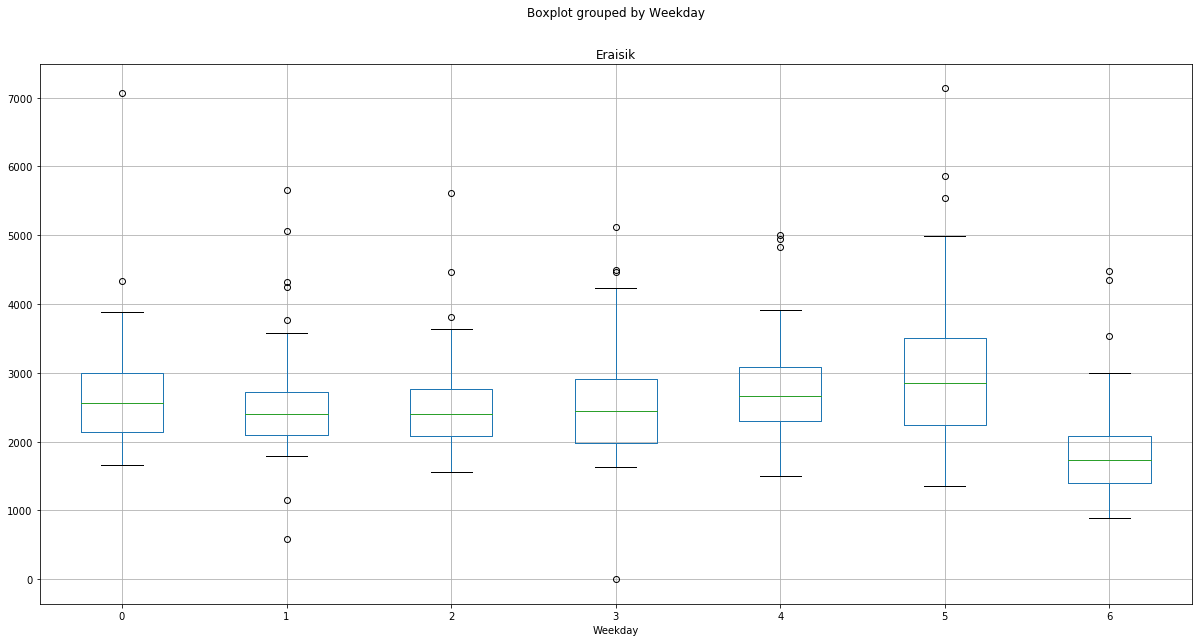

In [34]:
df_pivot_summa['2015'].boxplot(column='Eraisik', by='Weekday',figsize=(20,10))

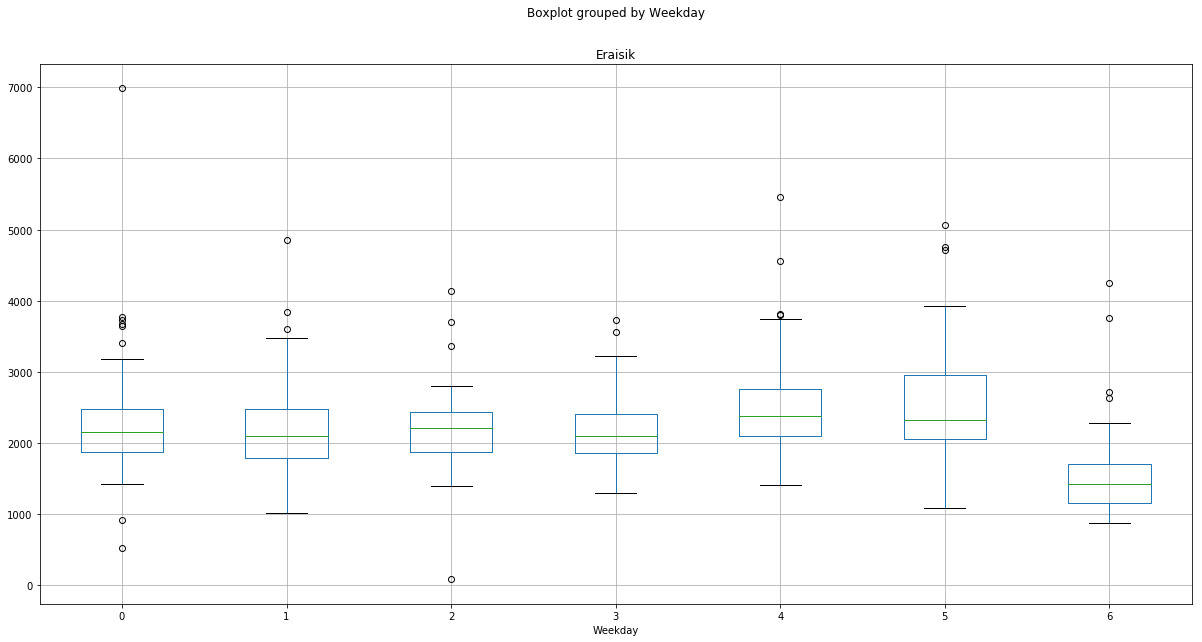

In [35]:
df_pivot_summa['2014'].boxplot(column='Eraisik', by='Weekday',figsize=(20,10))

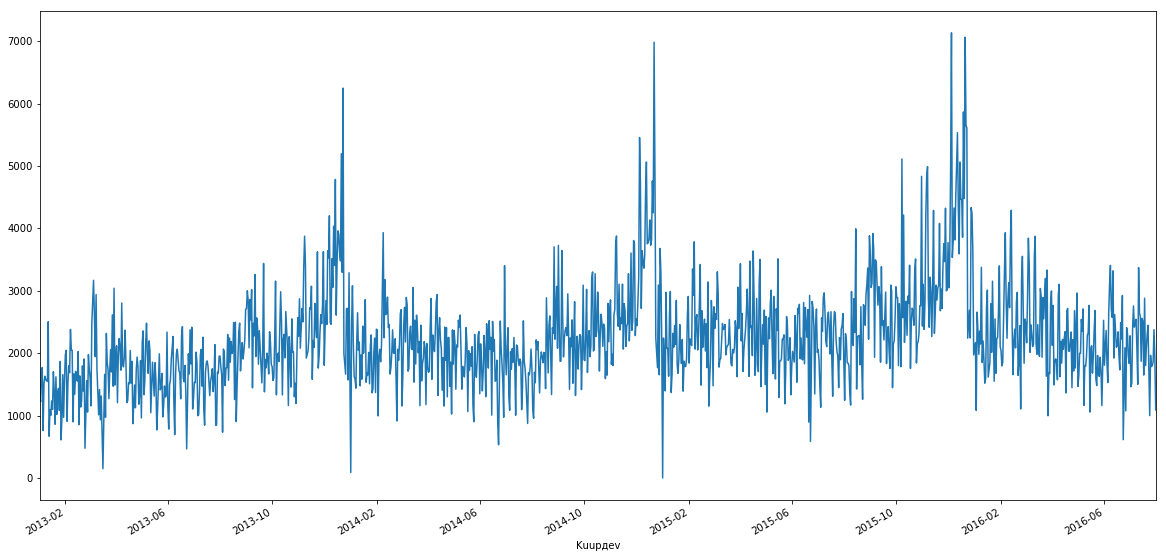

In [26]:
df_pivot_summa['Eraisik']['2013':'2016-07'].plot(figsize=(20,10))

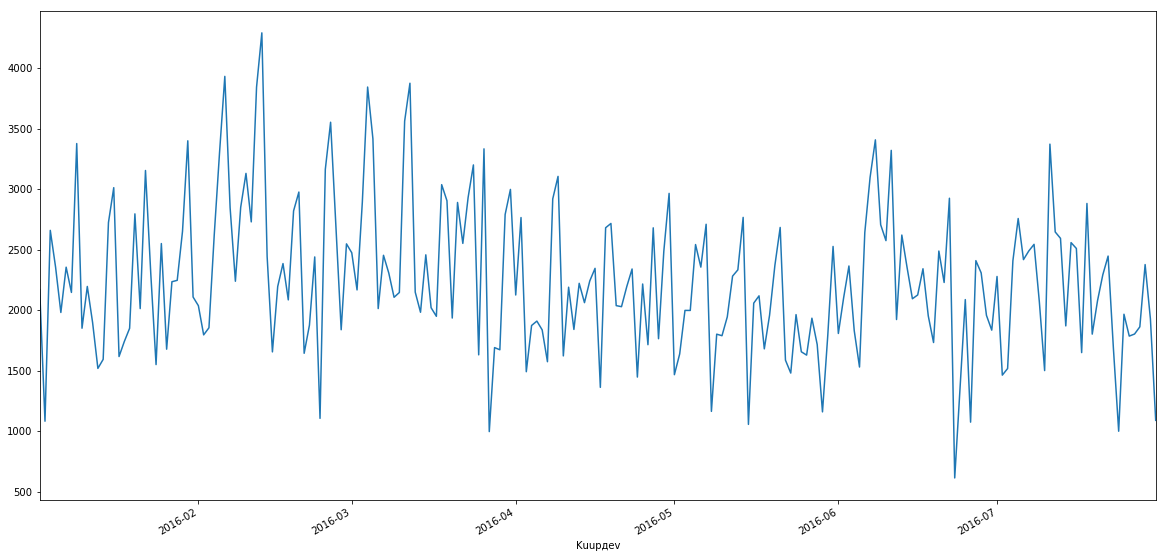

In [27]:
df_pivot_summa['Eraisik']['2016':'2016-07'].plot(figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000049FE3128>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000004A53DCF8>], dtype=object)

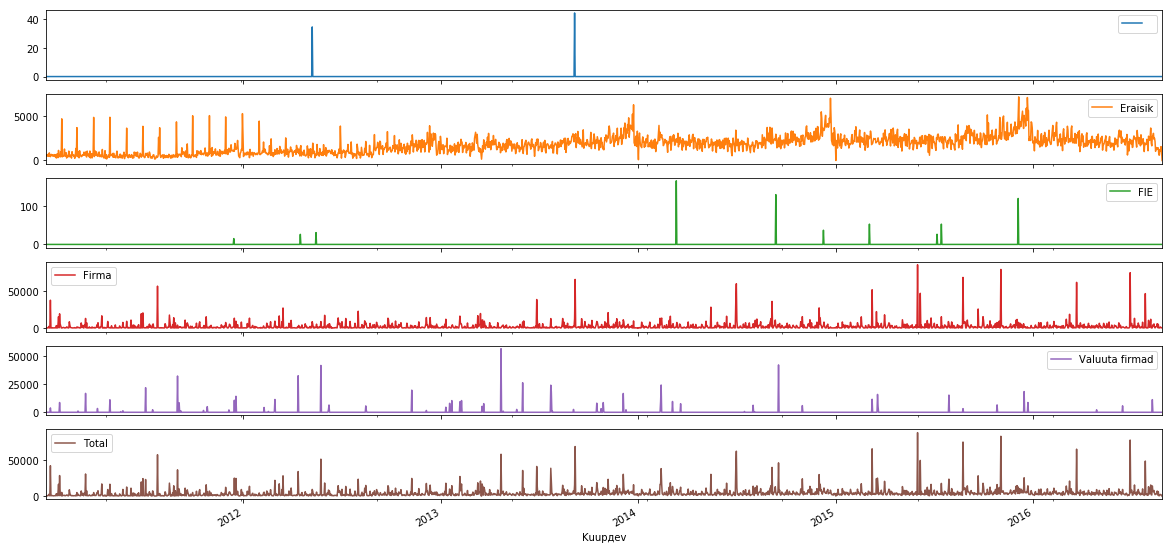

In [21]:
df_pivot_summa.plot(figsize=(20,10), subplots=True)

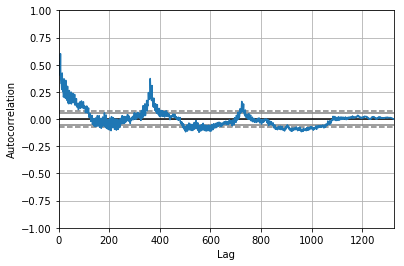

In [78]:
pd.tools.plotting.autocorrelation_plot(df_pivot_summa['Eraisik']['2013':])